In [290]:
import import_ipynb
import class_new
import importlib
importlib.reload(class_new)



<module 'eval_classes' from 'C:\\Users\\GJ\\PycharmProjects\\2022SPCUP\\eval_classes.py'>

In [86]:
import import_ipynb

from class_new import *
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score



known_volume_path = 'C:/Users/GJ/Desktop/연구실/2022SPCUP/spcup_2022_training_part1'
unknown_volume_path = './spcup_2022_unseen'



rs = 42
known_path, known_labels = file_path_list(known_volume_path)
unknown_path, unknown_labels = file_path_list(unknown_volume_path)
##train set
# print('raw train_set_num :',len(labels))
X_train_path, X_test_path, y_train_raw, y_test_raw = train_test_split(np.array(known_path),
                                                                      known_labels, test_size=0.2,
                                                                      stratify = known_labels, random_state=rs)

n = 100
n_mels = 64
train = data(X_train_path,y_train_raw,n_mels=n_mels, known = True)

test = data(X_test_path,y_test_raw, n_mels=n_mels, known = True)

unseen =data(unknown_path,unknown_labels, n_mels=n_mels, known = False)

# train = data(X_train_path[:n],y_train_raw[:n],n_mels=n_mels, known = True)

# test = data(X_test_path[:n],y_test_raw[:n], n_mels=n_mels, known = True)

# unseen = data(unknown_path[:n],unknown_labels[:n], n_mels=n_mels, known = False)

for i in [train, test, unseen]:
    i.extract_mel()
    i.reshape_data()



X_train.shape :  (25824, 64, 32, 1)
y_train.shape (25824, 5)
X_train.shape :  (6474, 64, 32, 1)
y_train.shape (6474, 5)
X_train.shape :  (6278, 64, 32, 1)
y_train.shape (6278, 6)


In [87]:
X_train = train.X_reshaped
y_train = train.y_reshaped
X_test = test.X_reshaped
y_test = test.y_reshaped
X_unseen = unseen.X_reshaped
y_unseen = unseen.y_reshaped[:,:5]

for i in [X_train, y_train, X_test, y_test, X_unseen, y_unseen]:
    print(i.shape)

(25824, 64, 32, 1)
(25824, 5)
(6474, 64, 32, 1)
(6474, 5)
(6278, 64, 32, 1)
(6278, 5)


In [88]:
print(X_test[0])

[[[-68.50158 ]
  [-64.73982 ]
  [-60.87342 ]
  ...
  [-69.70618 ]
  [-52.350998]
  [-42.707214]]

 [[-55.293034]
  [-48.766926]
  [-46.386154]
  ...
  [-61.4466  ]
  [-49.267456]
  [-40.192005]]

 [[-50.659416]
  [-47.219944]
  [-47.381466]
  ...
  [-50.5884  ]
  [-40.50096 ]
  [-32.750988]]

 ...

 [[-56.145782]
  [-46.008976]
  [-42.034817]
  ...
  [-25.831099]
  [-25.86507 ]
  [-35.47681 ]]

 [[-49.68257 ]
  [-40.832924]
  [-38.152084]
  ...
  [-25.4996  ]
  [-25.644062]
  [-36.216267]]

 [[-50.458042]
  [-44.20453 ]
  [-42.13161 ]
  ...
  [-32.063892]
  [-30.831394]
  [-39.1463  ]]]


In [599]:
from tensorflow.keras.models import load_model
model = load_model('./models_log/11_spcup_best_weight.h5')
model.pop()
model.compile()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_15 (Batc (None, 64, 32, 1)         4         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 32, 16)        416       
_________________________________________________________________
batch_normalization_16 (Batc (None, 64, 32, 16)        64        
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 32, 32)        12832     
_________________________________________________________________
batch_normalization_17 (Batc (None, 64, 32, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 32, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 6, 64)        

In [605]:
model.predict(X_test)

array([[ -9.487913 ,   9.205436 ,   5.0007386,  -9.404885 ,  -7.1758766],
       [ -6.193838 ,   7.746958 ,   6.5402093,  -5.492945 ,  -8.202208 ],
       [-14.50649  ,  10.502382 ,   5.861401 ,  -2.5051904,  -7.1004233],
       ...,
       [-12.119046 ,   1.5199201,   1.3833017,   9.274394 ,  -7.340212 ],
       [ -7.7199707,   1.9331212,  -1.2227393,   6.423269 ,  -6.2027974],
       [ -7.239548 ,   3.3496716,  -3.3956761,   9.723919 ,   1.647691 ]],
      dtype=float32)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_15 (Batc (None, 64, 32, 1)         4         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 32, 16)        416       
_________________________________________________________________
batch_normalization_16 (Batc (None, 64, 32, 16)        64        
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 32, 32)        12832     
_________________________________________________________________
batch_normalization_17 (Batc (None, 64, 32, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 32, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 6, 64)        

In [603]:
from tensorflow.keras.models import load_model
model = load_model('./models_log/11_spcup_best_weight.h5')

model.summary()


model.predict(X_test)

array([[ -9.487913 ,   9.205436 ,   5.0007386,  -9.404885 ,  -7.1758766],
       [ -6.193838 ,   7.746958 ,   6.5402093,  -5.492945 ,  -8.202208 ],
       [-14.50649  ,  10.502382 ,   5.861401 ,  -2.5051904,  -7.1004233],
       ...,
       [-12.119046 ,   1.5199201,   1.3833017,   9.274394 ,  -7.340212 ],
       [ -7.7199707,   1.9331212,  -1.2227393,   6.423269 ,  -6.2027974],
       [ -7.239548 ,   3.3496716,  -3.3956761,   9.723919 ,   1.647691 ]],
      dtype=float32)

In [517]:
# model.layers[-1] = keras.activations.linear
model.layers[-1] = keras.activations.softmax
model_act = model.layers[-1]


print(model_act)
prediction = model.predict(X_test)
print(np.round(prediction[0],3))

[0.    0.985 0.015 0.    0.   ]


In [550]:
dir(model)
print(model.layers)
# model.layers[-1] = keras.activations.linear
# model.layers[-1] = keras.activations.softmax
# model.pop()
model.pop()
print(model.summary())
prediction = model.predict(X_test)
print(np.round(prediction[0],3))

[<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001CA327A45B0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CA3388D820>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001CA321566A0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CA321F7EE0>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001CA3216F1C0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CA32BFFEE0>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001CA3279EF70>, <tensorflow.python.keras.layers.core.Flatten object at 0x000001CA329D8250>]
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_15 (Batc (None, 64, 32, 1)         4         
_________________________________________________________________
conv

In [548]:
model.weights


[<tf.Variable 'batch_normalization_15/gamma:0' shape=(1,) dtype=float32, numpy=array([0.9819667], dtype=float32)>,
 <tf.Variable 'batch_normalization_15/beta:0' shape=(1,) dtype=float32, numpy=array([0.01674664], dtype=float32)>,
 <tf.Variable 'batch_normalization_15/moving_mean:0' shape=(1,) dtype=float32, numpy=array([-43.267], dtype=float32)>,
 <tf.Variable 'batch_normalization_15/moving_variance:0' shape=(1,) dtype=float32, numpy=array([283.54065], dtype=float32)>,
 <tf.Variable 'conv2d_15/kernel:0' shape=(5, 5, 1, 16) dtype=float32, numpy=
 array([[[[-0.06858425, -0.11630961, -0.06331913, -0.09657831,
           -0.11534788,  0.06220179, -0.00712389,  0.04052822,
            0.09697024,  0.05188521,  0.04952761, -0.10448299,
            0.07942946,  0.02269809, -0.10388053, -0.01146511]],
 
         [[ 0.11485495, -0.01262418,  0.14459075, -0.16127446,
            0.00351639,  0.04602631,  0.06810442, -0.01455501,
            0.00474153,  0.10836244,  0.09103316, -0.08541925,
    

In [491]:
layers = model.layers
weight = layers[-1].get_weights()
print(weight)
print(weight[0].shape)

[]


In [537]:
train_loss, train_acc = model.evaluate(X_test,  y_test, verbose=2)

print('테스트 정확도:', train_acc)

from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test_raw, test_predict)
print('\n\n', cf)



203/203 - 3s - loss: 0.0603 - accuracy: 0.9793
테스트 정확도: 0.9793018102645874


 [[200   0   0   0   0]
 [  0 200   0   0   0]
 [  0   1 199   0   0]
 [  0   0   0 200   0]
 [  0   0   0   0 200]]
[7.5014981e-09 9.8529398e-01 1.4705814e-02 8.1509093e-09 7.5727193e-08]


In [502]:
print(np.sum(prediction[2]))

1.0


In [379]:
from scipy.stats import mode

prediction = model.predict(X_test)
predicted_classes = np.argmax(prediction, axis=1)
f = 0
test_predict = []
softmax_val = []

for j,i in enumerate(test.file_split_num):
#     print(y_test_raw[j])
#     print(np.round(prediction[f:f + i],3))
#     print(predicted_classes[f:f + i])
#     print('\n')
    softmax_val.append(prediction[f:f + i])
    test_predict.append(mode(predicted_classes[f:f + i])[0][0])
    f += i
    
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test_raw, test_predict)
print('\n\n', cf)



 [[200   0   0   0   0]
 [  0 200   0   0   0]
 [  0   5 195   0   0]
 [  0   0   0 200   0]
 [  0   0   0   0 200]]


In [466]:
from sklearn.metrics import confusion_matrix
from scipy.stats import mode

def see_pred1(data):
#     train_loss, train_acc = model.evaluate(data.X_reshaped,  data.y_reshaped, verbose=2)

#     print('테스트 정확도:', train_acc)
    
    prediction = model.predict(data.X_reshaped)
    predicted_classes = np.argmax(prediction, axis=1)
    f = 0
    test_predict = []
    softmax_val = []

    for j,i in enumerate(data.file_split_num):
        print(data.labels[j])
        print(np.round(prediction[f:f + i],3))
        print(predicted_classes[f:f + i])
        print('\n')
        softmax_val.append(prediction[f:f + i])
        test_predict.append(mode(predicted_classes[f:f + i])[0][0])
        f += i
        

#     cf = confusion_matrix(y_test_raw, test_predict)
#     print('\n\n', cf)


def see_pred1(data, thresh):
#     train_loss, train_acc = model.evaluate(data.X_reshaped,  data.y_reshaped, verbose=2)

#     print('테스트 정확도:', train_acc)
    
    prediction = model.predict(data.X_reshaped)
#     predicted_classes = np.argmax(prediction, axis=1)
    f = 0
    test_predict = []
    softmax_val = []
    num = 0
    for j,i in enumerate(data.file_split_num):
#         print(data.labels[j])
        min_soft = np.mean(prediction[f:f + i],axis = 0)
        std = np.mean(np.std(prediction[f:f+i],axis = 1))
        if np.max(min_soft)<thresh:
#             print(np.round(min_soft,3))
#             print(np.round(std,3))
#             print('\n')
            num+=1
            
#         print(predicted_classes[f:f + i])
        softmax_val.append(np.mean(prediction[f:f + i],axis = 0))
#         test_predict.append(mode(predicted_classes[f:f + i])[0][0])
        f += i
    print('num : ', num)
    return softmax_val

cf = confusion_matrix(y_test_raw, test_predict)
print('\n\n', cf)



 [[200   0   0   0   0]
 [  0 200   0   0   0]
 [  0   5 195   0   0]
 [  0   0   0 200   0]
 [  0   0   0   0 200]]


In [364]:
for th in np.arange(0.7,0.9,0.02):
    print(th)
    see_pred1(test,th)

    see_pred1(unseen,th)
    print('\n-----------------------------')

0.7
num :  12
num :  376

-----------------------------
0.72
num :  15
num :  416

-----------------------------
0.74
num :  19
num :  451

-----------------------------
0.76
num :  24
num :  481

-----------------------------
0.78
num :  30
num :  509

-----------------------------
0.8
num :  31
num :  551

-----------------------------
0.8200000000000001
num :  38
num :  577

-----------------------------
0.8400000000000001
num :  48
num :  632

-----------------------------
0.8600000000000001
num :  58
num :  674

-----------------------------
0.8800000000000001
num :  74
num :  711

-----------------------------
0.9000000000000001
num :  85
num :  742

-----------------------------


In [467]:
def ext_soft(data, n_round = 7):

    prediction = model.predict(data.X_reshaped)
    
    predicted_classes = np.argmax(prediction, axis=1)
    
    f = 0
    softmax_val = []
    test_predict = []

    for j,i in enumerate(data.file_split_num):
        mean_soft = np.mean(prediction[f:f + i],axis = 0)
#         mean_soft = np.mean(np.power(prediction[f:f + i],2),axis = 0)
        
        softmax_val.append(np.round(mean_soft,n_round))
        
        test_predict.append(mode(predicted_classes[f:f + i])[0][0])
        
#         predicted_classes = np.argmax(np.mean(np.power(prediction[f:f + i],1),axis = 0))
#         test_predict.append(predicted_classes)
        
        f += i
    return np.array(softmax_val), np.array(test_predict)


test_soft, test_predict = ext_soft(test)
unseen_soft, unseen_predict = ext_soft(unseen)
train_soft, train_predict = ext_soft(train)

#round 5로 했을 때 최고

from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test_raw, test_predict)
print('\n\n', cf)

test_soft.shape
unseen_soft.shape
train_soft.shape
print(test_soft[:10])



 [[200   0   0   0   0]
 [  0 200   0   0   0]
 [  0   1 199   0   0]
 [  0   0   0 200   0]
 [  0   0   0   0 200]]
[[1.000000e-07 9.631530e-01 3.672510e-02 1.212000e-04 5.000000e-07]
 [7.400000e-06 9.052867e-01 9.419230e-02 5.124000e-04 1.200000e-06]
 [1.000000e-07 9.806024e-01 1.737630e-02 1.225700e-03 7.955000e-04]
 [3.000000e-07 7.900420e-01 2.038452e-01 6.097100e-03 1.530000e-05]
 [9.993537e-01 0.000000e+00 6.460000e-04 0.000000e+00 3.000000e-07]
 [9.995571e-01 0.000000e+00 4.429000e-04 0.000000e+00 0.000000e+00]
 [9.993674e-01 0.000000e+00 6.326000e-04 0.000000e+00 1.000000e-07]
 [9.910000e-05 7.969350e-02 8.450702e-01 7.510560e-02 3.170000e-05]
 [1.300000e-06 1.074000e-04 1.107000e-04 9.997807e-01 0.000000e+00]
 [4.000000e-07 6.000000e-07 8.440000e-05 4.000000e-07 9.999141e-01]]


0.7
(4000, 5)
[0.14953144 0.14038979 0.13586164 0.14602806 0.14949174]
all time :  3.450120687484741
0.06766330632189613
0.06766330632189613


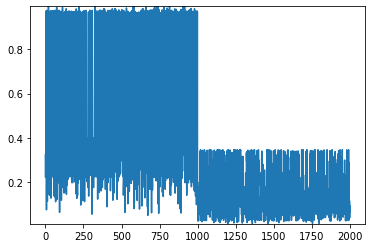

0.05176506311849853
1000
832
0.05741930585147056
999
769
0.06169605798792697
998
724
0.06260510475907925
997
712
0.06342057238030582
996
704
0.06534369891043124
995
692
0.06554638411558279
994
690
0.07717698892095022
993
621
0.08041352906399452
992
608
0.08211643537607242
991
604
0.08254600381696064
990
601
0.090690548772748
989
553
0.09098287473647303
988
552
0.09421235599508569
987
537
0.09855675908977002
986
525
0.10045786970001107
985
520
0.1032970186324953
984
511
0.10396444156900823
983
509
0.10415561256850717
982
509
0.1092320368565116
981
497
0.11357687468995965
980
486
0.11364063680756124
979
486
0.1159046299773978
978
476
0.11871748800172728
977
466
0.11893358096867182
976
466
0.12040975847870346
975
466
0.12048650118297857
974
466
0.12304829412706844
973
462
0.12424422395564347
972
455
0.12519664377663692
971
454
0.12901921095842675
970
443
0.12947170613247835
969
441
0.13089336633524284
968
439
0.1330321681733717
967
435
0.1352319480385694
966
430
0.1371580513153699
965
423

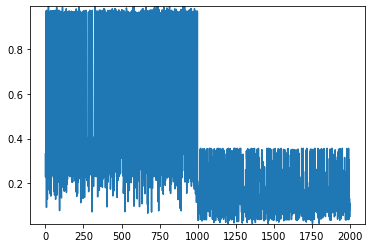

0.06569017255305307
1000
826
0.07061176668690697
999
779
0.07142868665682807
998
770
0.07228704427663919
997
755
0.07604465520846329
996
711
0.07634859134670086
995
709
0.07727011410123219
994
701
0.0877418679420019
993
637
0.09167345633352693
992
619
0.0937603998696866
991
610
0.09495609727990557
990
605
0.09687250622837215
989
598
0.10486720311659825
988
562
0.10802872841207857
987
549
0.11245879277840504
986
527
0.11412842324496604
985
521
0.11680231251661133
984
514
0.11760958740924261
983
512
0.1266035578561675
982
492
0.12786930703638832
981
486
0.1292081508687661
980
482
0.1297643299927098
979
480
0.13173484422573042
978
473
0.1324680605462073
977
472
0.13371006441004926
976
468
0.13611495562131434
975
462
0.1361617599627636
974
462
0.13886585813387864
973
457
0.14123213132500265
972
449
0.14227377631957733
971
447
0.14292217587165257
970
445
0.14551477999992324
969
437
0.14599432754797917
968
436
0.14728472252984634
967
430
0.15053471818918843
966
423
0.15191970325799767
965
42

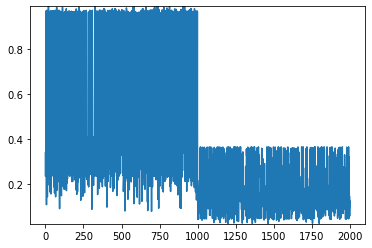

0.07831592964114684
1000
825
0.07969715319592786
999
818
0.081527738240513
998
815
0.08719666616335542
997
766
0.09014327379467932
996
727
0.09169769308534877
995
714
0.09217961636403613
994
712
0.0937406442849793
993
697
0.09689272202476164
992
672
0.10769247783082686
991
617
0.11078815786840046
990
603
0.11246090966795896
989
599
0.12016514565560636
988
565
0.12292514211997048
987
554
0.12745264098745046
986
538
0.12869644902547947
985
534
0.13134554454035827
984
525
0.13210542512196013
983
523
0.1412433930385473
982
492
0.1430783633413963
981
485
0.14324319666006805
980
485
0.14550975364154084
979
474
0.14766026586757022
978
470
0.1485581245800536
977
468
0.15157727571467108
976
461
0.1532903447625407
975
460
0.15410173277421652
974
458
0.155684295179942
973
453
0.1582846996822181
972
444
0.1587453425321482
971
442
0.15986675515047288
970
439
0.16101881669116164
969
437
0.16419729560099056
968
427
0.1643656559903972
967
427
0.16461510944023708
966
426
0.1661970955241356
965
422
0.16

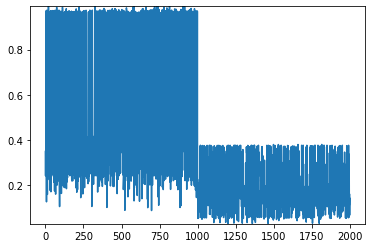

0.0866316079538731
1000
833
0.08769413530497124
999
829
0.09930166649985248
998
809
0.10024050701680166
997
806
0.10049142388194238
996
806
0.10425957552621229
995
783
0.10474656334719766
994
770
0.10869554558961177
993
724
0.11012413060436733
992
711
0.12529171228734626
991
614
0.12798057229637097
990
601
0.12939048895760497
989
597
0.13668358545744624
988
565
0.13903316794766135
987
552
0.1436560027006503
986
538
0.14429051727989697
985
536
0.14705446243901907
984
531
0.1475870448134452
983
530
0.15354441835175608
982
516
0.15818677925650892
981
493
0.1593546547538776
980
490
0.16020858142064248
979
486
0.16177714637938054
978
480
0.1624978902521203
977
476
0.16781031134226693
976
460
0.16863691594868466
975
459
0.16989335074370931
974
455
0.17290114725534136
973
448
0.17317804699928413
972
445
0.17660221664626766
971
438
0.1775083613026238
970
433
0.17914045409052043
969
428
0.17946183284513248
968
427
0.1795713439864846
967
427
0.17993725582359327
966
427
0.18036727819420648
965
42

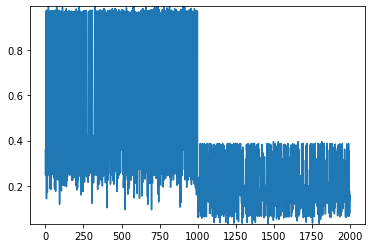

0.09562524751203129
1000
840
0.09636695293306942
999
839
0.10465623323896037
998
824
0.10733986372112776
997
819
0.1189818677791677
996
806
0.11967911984001958
995
804
0.1240557209694754
994
777
0.12734030912733746
993
740
0.12984663244690525
992
710
0.14447053576712793
991
610
0.1465591071213392
990
598
0.14769286526253902
989
593
0.1544736371687428
988
565
0.15642869938304102
987
556
0.16099465123087023
986
537
0.16113659215764292
985
537
0.16400193758735945
984
528
0.16414498003156477
983
528
0.1667909290384744
982
519
0.17416549543369236
981
498
0.17592787586298472
980
491
0.17594933280894837
979
491
0.17678719332718468
978
489
0.1783327922593422
977
485
0.1824899760649759
976
477
0.18501151941588034
975
469
0.18503756337168234
974
469
0.18737220553062708
973
462
0.18809924544416792
972
459
0.18990054952776503
971
455
0.19101594809944314
970
449
0.1915151332061249
969
446
0.19368769064096727
968
436
0.1937950323934943
967
435
0.19477291563362756
966
432
0.19497655531622857
965
432


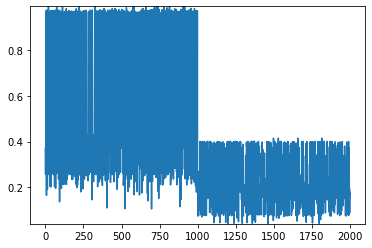

0.10532700881225286
1000
840
0.1057691477909552
999
839
0.10947089467988552
998
835
0.11510503300363883
997
830
0.1364177694862654
996
808
0.1404715138178082
995
802
0.14504331830476172
994
781
0.14757329590840557
993
749
0.15124893703112416
992
715
0.16515938645515446
991
596
0.1664936123871595
990
586
0.16734142936967825
989
583
0.17352863291153184
988
569
0.1751227431171891
987
557
0.17883996119728243
986
537
0.1799029315611852
985
530
0.18105128097563147
984
525
0.18181718212125433
983
523
0.1821976770930145
982
523
0.19111329140725666
981
492
0.1912486230167375
980
491
0.192794952684299
979
490
0.1952176798741427
978
483
0.19539634019667002
977
482
0.1982171759230694
976
475
0.2008581515227178
975
471
0.2011950687635182
974
471
0.20245390254247744
973
462
0.20255194001056112
972
462
0.20419445554832014
971
460
0.20439158967899057
970
460
0.20649989682891118
969
452
0.20764950572942384
968
447
0.20826465696407478
967
443
0.20868320782686212
966
441
0.20895191345092662
965
440
0.210

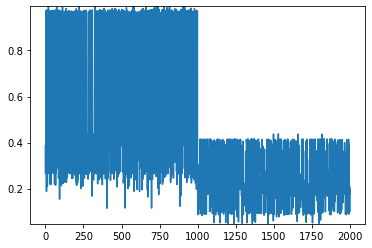

0.11499785035658386
1000
841
0.115726605315891
999
839
0.11591416796337031
998
838
0.12356626585491211
997
831
0.1544375253698095
996
811
0.1635972314790067
995
802
0.16756064588458194
994
781
0.16926943253096305
993
765
0.17415725965923315
992
712
0.1872117139584117
991
588
0.18768903397839573
990
586
0.18824259752165443
989
581
0.19377582029673743
988
562
0.19505344859767912
987
558
0.19633287927576443
986
546
0.1977967953652058
985
536
0.19989618972823572
984
526
0.20058142156151493
983
524
0.20158089654221117
982
520
0.20737677033331287
981
496
0.2094408045056932
980
491
0.21074618628267344
979
489
0.211715430078381
978
484
0.2131416674894373
977
481
0.21500627312957263
976
474
0.21512744405412584
975
473
0.2165555357960383
974
470
0.2171638369310027
973
467
0.21822205987488835
972
459
0.21837961319114904
971
459
0.21876282321153975
970
455
0.21919629016563477
969
452
0.21952746598692546
968
449
0.22061786299973773
967
440
0.22093218264790307
966
437
0.2217595360436026
965
426
0.22

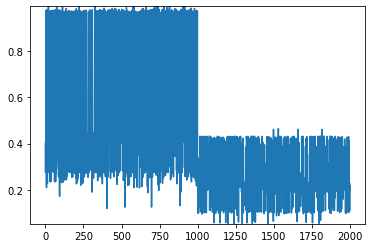

0.12127246568820209
1000
852
0.12677042024659915
999
837
0.12677160868351933
998
837
0.13271418222260536
997
831
0.1736394514604237
996
815
0.18810447563595553
995
799
0.19138590698924285
994
784
0.19223179371806268
993
778
0.1983184243826626
992
704
0.20998034789262213
991
583
0.21023099872925782
990
582
0.21040072461816492
989
580
0.21257776636516293
988
563
0.21507160730724584
987
553
0.21608147899373736
986
548
0.21776940077855936
985
543
0.22034994027676758
984
524
0.22098513995443128
983
522
0.22201611990528636
982
520
0.22361279627311006
981
513
0.2246960962701679
980
509
0.2265910460382707
979
500
0.2271604773152832
978
496
0.22719143632132877
977
496
0.2286766681126061
976
485
0.22927413919627926
975
480
0.22973625469632836
974
477
0.23072853981644553
973
467
0.23202583863735513
972
453
0.2328046494774209
971
447
0.2339894165250058
970
441
0.23511576628205902
969
436
0.23584748479435377
968
434
0.23587916527995278
967
434
0.2359877396275616
966
434
0.23653598346920632
965
433


In [446]:
import time
def make_pdf_eval(data, pa):
    var_type = 'o' * data.shape[1]

    std_feature = np.std(data, axis=0)
    print(data.shape)
    d = data.shape[1]
    feature_length = data.shape[0]
    c = (4 / (d + 2) / feature_length) ** (1 / (d + 4))
    bw = std_feature * c
    print(bw)
#     print(bw.shape)
    # bw = bw.transpose()

    bw = bw * pa
    dens = sm.nonparametric.KDEMultivariate(data=data, var_type=var_type, bw=bw * pa)
    return dens


for pa in np.arange(0.7,1.5,0.1):
# for pa in [2.6000000000000014]:
    print(pa)
    dens = make_pdf_eval(train_soft, pa)

    all_time = time.time()
    pdf_t = dens.pdf(test_soft)
    pdf_u = dens.pdf(unseen_soft)
    pdf_tr = dens.pdf(train_soft)
    pdf_all =  np.concatenate((pdf_t,pdf_u),axis = 0)
    print('all time : ', time.time() -all_time)
    
    print(max(pdf_tr))
    print(max(pdf_t))
    pdf_all = pdf_all/max(pdf_tr)
    pdf_at = pdf_all[:pdf_t.size]
    pdf_au = pdf_all[pdf_t.size:]
#     print(len(pdf_at[pdf_at == min(pdf_all)]))
    
    plt.plot(pdf_all)
    plt.ylim([np.min(pdf_all),np.sort(pdf_at)[-8]])
#     plt.ylim([np.min(pdf_all),np.max(pdf_)[-8]])
    
    plt.show()
    for i in np.unique(pdf_at)[:50]:
        print(i)
        print(len(pdf_at[pdf_at >= i]))
        print(len(pdf_au[pdf_au >= i]))
        
    print('----------------------------------')

In [398]:
np.sort(pdf_at)

array([-3.37508221e-07, -3.37508221e-07, -3.37508221e-07, -3.37508221e-07,
       -3.37508221e-07, -3.37508221e-07, -3.37508221e-07, -3.37508221e-07,
       -3.37508221e-07, -3.37508221e-07, -3.37508221e-07, -3.37508221e-07,
       -3.37508221e-07, -3.37508221e-07, -3.37508221e-07, -3.37508221e-07,
       -3.37508221e-07, -3.37508221e-07, -3.37508221e-07, -3.37508221e-07,
       -3.37508221e-07, -3.37508221e-07, -3.37508221e-07, -3.37508221e-07,
       -3.37508221e-07, -3.37508221e-07, -3.37508221e-07, -3.37508221e-07,
       -3.37508221e-07, -3.37508221e-07, -3.37508221e-07, -3.37508221e-07,
       -3.37508221e-07, -3.37508221e-07, -3.37508221e-07, -3.37508221e-07,
       -3.37508221e-07, -3.37508221e-07, -3.37508221e-07, -3.37508221e-07,
       -3.37508221e-07, -3.37508221e-07, -3.37508221e-07, -3.37508221e-07,
       -3.37508221e-07, -3.37508221e-07, -3.37508221e-07, -3.37508221e-07,
       -3.37508221e-07, -3.37508221e-07, -3.37508221e-07, -3.37508221e-07,
       -3.37508221e-07, -

0.8
(4000, 5)
[0.14953832 0.14231423 0.1395225  0.14705856 0.14952542]
all time :  3.231940984725952
0


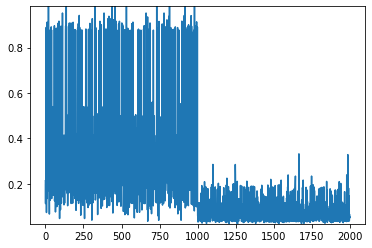

0.034627716371334084
1000
879
0.038772113314234295
999
770
0.03901006477902058
998
763
0.039339460120881166
997
758
0.046605584658034514
996
666
0.04663331468204001
995
666
0.04933320522217983
994
637
0.05795983575484342
993
560
0.06111331755029269
992
531
0.06316552687648959
991
523
0.06355655649411303
990
520
0.06368798545987593
989
519
0.06410205837948536
988
515
0.06627741282613199
987
500
0.06699698091671487
986
494
0.06783038231933053
985
491
0.07007502064151931
984
478
0.07075044254254041
983
469
0.07307662583635728
982
460
0.0737592425748347
981
453
0.07394218792194747
980
453
0.07557875338073546
979
439
0.07791107954700169
978
424
0.08016272073250257
977
413
0.08267348271316656
976
397
0.08328619281811298
975
395
0.08414167824929564
974
387
0.08457606474386274
973
383
0.08580950967509807
972
378
0.08839156617766795
971
367
0.0907267625660202
970
350
0.09126701436159375
969
350
0.09284021236102381
968
343
0.09325156069125161
967
342
0.09448112420807006
966
336
0.094643146412773

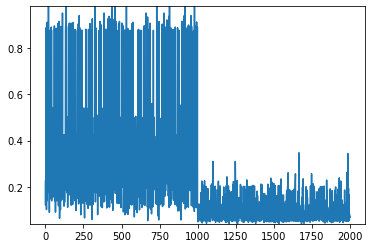

0.05362147908209183
1000
824
0.0563995106618368
999
772
0.05658362969517157
998
767
0.05847780963506474
997
733
0.06364075677040087
996
669
0.06544343603170742
995
648
0.06989212331988798
994
597
0.07382570589032338
993
576
0.0787579777005542
992
539
0.07898575496534656
991
538
0.07945521183020653
990
535
0.07958054183197186
989
533
0.08066110436196393
988
524
0.08330511963697004
987
507
0.08744188349989875
986
470
0.08765577710877913
985
468
0.08951493522354122
984
453
0.09052785680381216
983
446
0.09134748016215251
982
439
0.09345525813005777
981
429
0.09507289875994124
980
422
0.09563305534306943
979
415
0.09714623915220642
978
404
0.09832175034188846
977
398
0.10025283629522744
976
385
0.10151283974189916
975
378
0.10160229357027943
974
377
0.10195569007391944
973
376
0.1033368805543408
972
369
0.104074205097961
971
366
0.10662686825533037
970
350
0.1068087067760209
969
349
0.10848435315975738
968
345
0.10896225421893636
967
343
0.11005800059834871
966
335
0.11014741879294092
965
3

In [458]:
for pa in [0.8, 1]:
    print(pa)
    dens = make_pdf_eval(train_soft, pa)

    all_time = time.time()
    pdf_t = dens.pdf(test_soft)
    pdf_u = dens.pdf(unseen_soft)
    pdf_tr = dens.pdf(train_soft)
    pdf_all =  np.concatenate((pdf_t,pdf_u),axis = 0)
    print('all time : ', time.time() -all_time)
    
    pdf_all = pdf_all/max(pdf_tr)
    pdf_at = pdf_all[:1000]
    pdf_au = pdf_all[1000:]
    print(len(pdf_at[pdf_at == min(pdf_all)]))
    
    plt.plot(pdf_all)
#     plt.ylim([np.min(pdf_all),np.sort(pdf_all)[-8]])
    plt.ylim([np.min(pdf_all),np.sort(pdf_at)[-8]])
    
    plt.show()
    
    for i in np.unique(pdf_at)[:50]:
        print(i)
        print(len(pdf_at[pdf_at >= i]))
        print(len(pdf_au[pdf_au >= i]))


roung 5
962
502

round 7
962
468

val_type = c
pa = 1.2
965
427

val_type = o
n_round = 7
pa = 0.75
970
366


983
446

In [376]:
thresh = 1.1851049339765359e-07
print(np.where(pdf_all<thresh)[0])


[   0    1    4   14   17   22   25   31   35   41   55   57   62   66
   75   84   86   90   91   93   96   98  109  110  116  118  122  129
  130  136  142  148  153  161  167  173  174  178  179  197  204  209
  210  217  230  231  234  236  238  239  243  246  249  251  256  257
  269  274  276  278  284  289  293  294  296  301  304  309  311  315
  337  339  340  344  351  355  356  359  364  366  368  374  379  387
  392  394  397  401  403  406  407  410  421  423  425  430  431  436
  437  440  444  450  452  459  460  461  467  475  482  488  489  491
  494  495  496  504  509  512  518  523  527  530  531  544  548  553
  554  558  564  565  569  571  572  596  597  598  599  602  604  614
  616  619  621  631  633  634  636  646  650  657  665  666  667  674
  675  676  677  690  692  693  697  701  708  715  716  720  721  723
  724  729  733  744  750  751  752  753  759  761  765  769  777  784
  785  787  810  814  828  832  835  847  850  851  863  864  869  870
  871 

In [288]:
pdf_at[pdf_at ==np.unique(pdf_at)[-1]]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [260]:
print(pdf_as)

[-8.19551913e-05  4.16973500e-05  9.90962863e-05 -8.19551913e-05
  4.24218329e-05 -1.02822099e-04  9.26478612e-05 -8.28615848e-05
 -8.28615848e-05 -1.12419483e-04 -6.38071552e-05  4.16973500e-05
 -5.86863056e-05 -8.19551913e-05 -6.38071552e-05 -6.38071552e-05
 -8.29482565e-05  4.18727893e-05  4.45753603e-05 -1.12419483e-04
  4.16973500e-05 -9.23346441e-05  1.03829212e-04  9.90962863e-05
 -8.19551913e-05 -5.73517957e-05 -8.28615848e-05 -6.38071552e-05
 -8.31212327e-05 -8.29482565e-05 -1.12419483e-04 -6.30182370e-05
  1.05231244e-04  1.02924395e-04 -8.30513467e-05 -6.38071552e-05
 -1.12419483e-04 -1.06925772e-04  9.66328312e-05 -1.02822099e-04
 -8.28615848e-05 -8.29482565e-05 -5.99234771e-05 -6.38071552e-05
 -5.57869826e-05 -6.38071552e-05  6.12854311e-05 -8.30785116e-05
  4.16973500e-05 -7.05452382e-05  9.45713861e-05 -6.38071552e-05
  4.18727893e-05  5.13130132e-05 -6.38071552e-05 -1.02822099e-04
 -1.02822099e-04 -5.61237352e-05 -5.57869826e-05 -1.02754515e-04
 -6.38071552e-05 -8.28615

[7.45270699e-19 7.45270699e-19 7.45270699e-19 7.45270699e-19
 7.45270699e-19 1.07545321e-18 7.45270699e-19 7.45270699e-19
 8.10407297e-19 1.16929676e-18 8.39498713e-19 9.81115348e-19
 7.45270699e-19 7.45270699e-19 7.45270699e-19 7.45270699e-19
 7.45270699e-19 7.45270699e-19 7.45270699e-19 7.45270699e-19
 2.39618324e-18 7.45270699e-19 8.39498713e-19 7.45270699e-19
 7.45270699e-19 7.45270699e-19 7.45270699e-19 7.45270699e-19
 7.45270699e-19 7.45270699e-19 7.45270699e-19 7.45270699e-19
 7.45270699e-19 1.40486679e-18 7.45270699e-19 7.45270699e-19
 7.45270699e-19 7.45270699e-19 8.86777488e-19 8.39498713e-19
 7.45270699e-19 7.92384706e-19 7.45270699e-19 7.45270699e-19
 7.45270699e-19 7.45270699e-19 1.31063878e-18 7.45270699e-19
 7.45270699e-19 7.45270699e-19 8.86612719e-19 7.45270699e-19
 7.45270699e-19 7.45270699e-19 7.45270699e-19 7.45270699e-19
 7.45270699e-19 7.45270699e-19 7.92439629e-19 1.07545321e-18
 7.45270699e-19 7.45270699e-19 7.45270699e-19 7.45270699e-19
 9.81115348e-19 7.452706

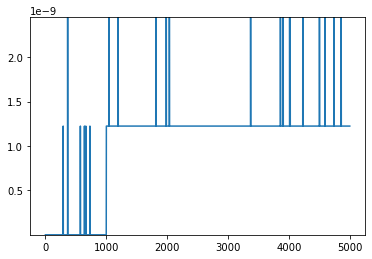

In [223]:
# pdf_all = pdf_all/np.max(pdf_all)




# print(pdf_all[:100])
# plt.plot(pdf_u)

In [220]:
print(np.sort(pdf_all))

[2.02875931e-10 2.02875931e-10 2.02875931e-10 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


In [201]:
pdf_at = pdf_all[:1000]
print(len(pdf_at[pdf_at <= min(pdf_all)]))

print(max(pdf_all[1000:]))

749
3.138510027888842e-18


In [105]:
see_pred(unseen)



5
[[0.    0.983 0.017 0.    0.   ]
 [0.    0.878 0.018 0.103 0.   ]
 [0.    0.034 0.966 0.    0.   ]
 [0.    0.979 0.021 0.    0.   ]
 [0.    0.97  0.03  0.    0.   ]]
[1 1 2 1 1]


5
[[0.    0.794 0.206 0.    0.   ]
 [0.    0.717 0.282 0.001 0.   ]
 [0.    0.989 0.011 0.    0.   ]
 [0.    0.857 0.143 0.    0.   ]
 [0.    0.272 0.697 0.031 0.   ]]
[1 1 1 1 2]


5
[[0.    0.766 0.23  0.004 0.   ]
 [0.    0.004 0.996 0.    0.   ]
 [0.    0.015 0.907 0.078 0.   ]
 [0.    0.081 0.001 0.918 0.   ]
 [0.    0.17  0.829 0.001 0.   ]
 [0.    0.632 0.367 0.    0.001]
 [0.    0.001 0.999 0.    0.   ]
 [0.    0.956 0.042 0.001 0.   ]]
[1 2 2 3 2 1 2 1]


5
[[0.    0.156 0.844 0.    0.   ]
 [0.    0.003 0.997 0.    0.   ]
 [0.    0.017 0.983 0.    0.   ]
 [0.    0.942 0.043 0.015 0.   ]
 [0.    0.079 0.92  0.    0.   ]
 [0.    0.97  0.03  0.    0.   ]
 [0.    0.701 0.299 0.    0.   ]]
[2 2 2 1 2 1 1]


5
[[0.    0.446 0.554 0.001 0.   ]
 [0.    0.941 0.058 0.001 0.   ]
 [0.    0.515 0.485 0.    0. 

5
[[0.    0.979 0.021 0.    0.   ]
 [0.    0.964 0.035 0.    0.   ]]
[1 1]


5
[[0.    0.199 0.801 0.    0.   ]
 [0.    0.033 0.945 0.022 0.   ]
 [0.    0.    1.    0.    0.   ]
 [0.    0.041 0.959 0.    0.   ]
 [0.    0.947 0.053 0.    0.   ]
 [0.    0.749 0.251 0.    0.   ]
 [0.    0.    1.    0.    0.   ]
 [0.    0.004 0.996 0.    0.   ]]
[2 2 2 2 1 1 2 2]


5
[[0.    0.    1.    0.    0.   ]
 [0.    0.165 0.835 0.    0.   ]
 [0.    0.48  0.52  0.    0.   ]
 [0.    0.006 0.994 0.    0.   ]]
[2 2 2 2]


5
[[0.    0.001 0.999 0.    0.   ]
 [0.    0.001 0.999 0.    0.   ]
 [0.    0.021 0.979 0.    0.   ]
 [0.    0.873 0.127 0.001 0.   ]
 [0.    0.226 0.774 0.    0.   ]
 [0.    0.002 0.998 0.    0.   ]]
[2 2 2 1 2 2]


5
[[0.    0.055 0.945 0.    0.   ]
 [0.    0.001 0.999 0.    0.   ]
 [0.    0.17  0.812 0.018 0.   ]
 [0.    0.951 0.012 0.037 0.   ]
 [0.001 0.079 0.891 0.027 0.003]
 [0.    0.991 0.009 0.    0.   ]]
[2 2 2 1 2 1]


5
[[0.    0.351 0.649 0.    0.   ]
 [0.    0.001 0.999 

 [0.    0.79  0.21  0.    0.   ]]
[2 2 2 2 2 2 2 1]


5
[[0.    0.67  0.33  0.    0.   ]
 [0.    0.966 0.034 0.    0.   ]]
[1 1]


5
[[0.    0.996 0.004 0.    0.   ]
 [0.002 0.25  0.743 0.    0.005]]
[1 2]


5
[[0.    0.003 0.996 0.    0.   ]
 [0.    0.579 0.421 0.    0.   ]
 [0.    0.9   0.1   0.    0.   ]
 [0.    0.536 0.464 0.    0.   ]
 [0.    0.    0.993 0.006 0.   ]
 [0.    0.005 0.994 0.001 0.   ]
 [0.    0.815 0.185 0.    0.   ]
 [0.    0.984 0.006 0.01  0.   ]]
[2 1 1 1 2 2 1 1]


5
[[0.    0.877 0.123 0.    0.   ]]
[1]


5
[[0.    0.311 0.663 0.026 0.   ]
 [0.    0.995 0.005 0.    0.   ]
 [0.    0.266 0.733 0.001 0.   ]
 [0.    0.887 0.113 0.    0.   ]
 [0.    0.974 0.026 0.    0.   ]
 [0.    0.008 0.992 0.    0.   ]
 [0.    0.604 0.396 0.    0.   ]]
[2 1 2 1 1 2 1]


5
[[0.    0.002 0.998 0.    0.   ]
 [0.    0.    1.    0.    0.   ]
 [0.    0.001 0.998 0.    0.001]
 [0.    0.003 0.997 0.    0.   ]
 [0.    0.    1.    0.    0.   ]
 [0.    0.    1.    0.    0.   ]
 [0.    0. 

 [0.    0.894 0.106 0.    0.   ]]
[3 1 2 1 1 2 1 1 1]


5
[[0.    0.99  0.007 0.003 0.   ]
 [0.    0.625 0.371 0.003 0.   ]
 [0.    0.97  0.03  0.    0.   ]
 [0.    0.999 0.001 0.    0.   ]
 [0.    0.    0.999 0.    0.   ]]
[1 1 1 1 2]


5
[[0.    0.929 0.04  0.006 0.025]
 [0.    0.39  0.609 0.    0.   ]
 [0.    1.    0.    0.    0.   ]
 [0.    0.757 0.243 0.    0.   ]
 [0.    0.999 0.001 0.    0.   ]
 [0.    0.017 0.981 0.001 0.   ]
 [0.    0.877 0.123 0.    0.   ]
 [0.    0.112 0.876 0.011 0.   ]
 [0.    1.    0.    0.    0.   ]]
[1 2 1 1 1 2 1 2 1]


5
[[0.    0.144 0.856 0.    0.   ]
 [0.    0.094 0.906 0.    0.   ]
 [0.    0.937 0.063 0.    0.   ]
 [0.    0.629 0.371 0.    0.   ]
 [0.    0.002 0.998 0.    0.   ]
 [0.    0.998 0.    0.001 0.   ]
 [0.    0.998 0.002 0.    0.   ]
 [0.    0.994 0.    0.006 0.   ]]
[2 2 1 1 2 1 1 1]


5
[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
[2 2]


5
[[0.    0.521 0.479 0.    0.   ]
 [0.    0.999 0.001 0.    0.   ]
 [0.001 0.002 0.996 0.    0.   ]
 [0. 

In [91]:
len(test_predict)

1000



 [[200   0   0   0   0]
 [  0 200   0   0   0]
 [  0   5 195   0   0]
 [  0   0   0 200   0]
 [  0   0   0   0 200]]


In [60]:


prediction = model.predict(X_test)

from scipy.stats import mode
predicted_classes = np.argmax(prediction, axis = 1)
f = 0
test_predict=[]
for i in test.file_split_num:
#     print(predicted_classes[f:f+i])
    test_predict.append(mode(predicted_classes[f:f+i])[0][0])
    f+=i
                    
acc_bool = test_predict==y_test_raw
print(test_predict[:100])
print(y_test_raw[:100])
print(acc_bool[:100])
test_accuracy = acc_bool.tolist().count(True)/len(acc_bool)
print(test_accuracy)
print('test_set.size : ', acc_bool.size)


[1, 1, 1, 1, 0, 0, 0, 2, 3, 4, 4, 0, 1, 3, 4, 4, 0, 4, 1, 1, 0, 1, 4, 0, 1, 2, 2, 1, 2, 3, 2, 0, 1, 4, 3, 3, 1, 1, 0, 4, 0, 4, 1, 1, 4, 3, 4, 0, 3, 2, 4, 4, 3, 1, 2, 3, 1, 1, 0, 0, 2, 4, 4, 4, 0, 3, 2, 3, 4, 4, 1, 0, 3, 3, 0, 1, 3, 0, 4, 0, 1, 0, 3, 0, 2, 1, 2, 1, 4, 0, 3, 2, 3, 2, 4, 3, 2, 4, 1, 2]
[1 1 1 1 0 0 0 2 3 4 4 0 1 3 4 4 0 4 1 1 0 1 4 0 1 2 2 1 2 3 2 0 1 4 3 3 1
 1 0 4 0 4 1 1 4 3 4 0 3 2 4 4 3 1 2 3 1 1 0 0 2 4 4 4 0 3 2 3 4 4 1 0 3 3
 0 2 3 0 4 0 1 0 3 0 2 1 2 1 4 0 3 2 3 2 4 3 2 4 1 2]


<ipython-input-60-5214f044c15a>:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  acc_bool = test_predict==y_test_raw


TypeError: 'bool' object is not subscriptable

In [28]:


f = 0
for i in test.file_split_num:
    print(np.round(prediction[f:f+i],3))
    print('\n')
    f += i

[[1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [0.398 0.    0.    0.    0.602]]


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


[[1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [0.001 0.    0.    0.    0.999]
 [0.061 0.    0.    0.    0.939]
 [1.    0.    0.    0.    0.   ]
 [0.    0.    0.001 0.    0.999]]


[[1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [0.977 0.    0.    0.    0.023]
 [1.    0.

 [1. 0. 0. 0. 0.]]


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


[[1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [0.208 0.    0.    0.    0.792]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [0.001 0.    0.    0.    0.999]]


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


[[1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [0.977 0.    0.    0.    0.023]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 

 [0.    0.    0.    0.    1.   ]]


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


[[1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [0.979 0.    0.    0.    0.021]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]]


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


[[0.95  0.    0.    0.    0.05 ]
 [0.025 0.    0.515 0.    0.46 ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [0.    0.    0.001 0.    0.999]
 [1.    0.    0.    0.    0.   ]]


[[1. 0. 0. 0.